In [2]:
import gudhi
import numpy as np
import networkx as nx

In [3]:
def PrintSimplices(simpcomplex):
    '''
    Print a list of the simplices of the simplicial complex 'simpcomplex'.

    Input:
        simpcomplex: a gudhi.SimplexTree

    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        PrintSimplices(simpcomplex)
    '''
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")

def DrawSimplicialComplex(simpcomplex, pos=None):
    '''
    Draw the 1-skeleton of the simplicial complex 'simpcomplex', in the plane.
    If 'pos==None', the position of the vertices are chosen at random, according to the 'spring_layout' of networkx.
    If pos is a dict

    Input:
        simpcomplex: a gudhi.SimplexTree
        pos: a dict {(vertex of simpcomplex): (list of floats of length 2) }

    Example 1:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        DrawSimplicialComplex(simpcomplex)

    Example 2:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        pos = {0:[0,0], 1:[0,1]}
        DrawSimplicialComplex(simpcomplex, pos=pos)
    '''
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')

def NumberOfConnectedComponents(simpcomplex, verbose = 'True'):
    '''
    Print the number of connected components of the simplicial complex 'simpcomplex'.

    Input:
        simpcomplex: a gudhi.SimplexTree

    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        NumberOfConnectedComponents(simpcomplex)
    '''
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    if verbose: print('The simplicial complex admits '+repr(nbr_components)+' connected component(s).')
    return nbr_components

def EulerCharacteristic(simpcomplex, verbose = 'True'):
    '''
    Print the Euler characteristic of the simplicial complex 'simpcomplex'.

    Input:
        simpcomplex: a gudhi.SimplexTree

    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        EulerCharacteristic(simpcomplex)
    '''
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

## Triangulation of the circle

We start by considering a simplicial complex $S$ that is a triangulation of the circle.
It is given by:
- three vertices: $0$,$1$ and $2$,
- three edges: $[0,1]$, $[1,2]$ and $[2,0]$.


In [4]:
# We build a SimplexTree structure on gudhi

simpcomplex = gudhi.SimplexTree()
print(simpcomplex)

In [5]:
# We add the vertices

simpcomplex.insert([0])
simpcomplex.insert([1])
simpcomplex.insert([2])

True

In [6]:
# Let us verify that the vertices are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]


In [7]:
# We add the edges

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])

True

In [8]:
# Let us verify that the edges are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


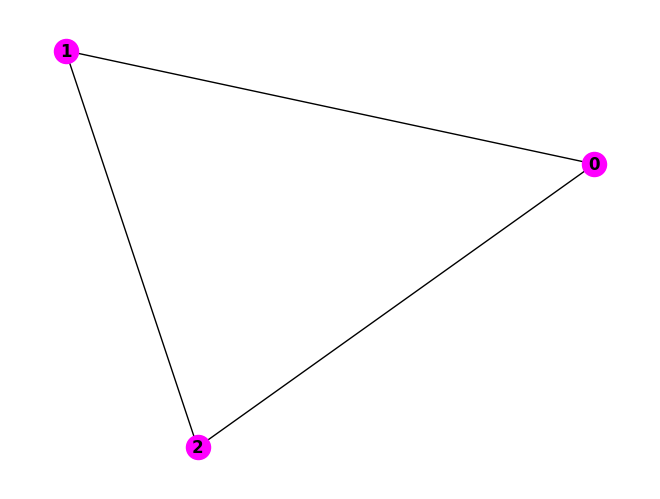

In [9]:
# The following function allows to draw the simplicial complex (uses the library networkx)

DrawSimplicialComplex(simpcomplex)

In [10]:
# In Gudhi, if a simplex is added to the complex, then all its faces are
# Hence we can use the simpler code:

simpcomplex2 = gudhi.SimplexTree()

simpcomplex2.insert([0,1])
simpcomplex2.insert([1,2])
simpcomplex2.insert([2,0])

PrintSimplices(simpcomplex2)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [11]:
# We can do it even faster, by using the remove_maximal_simplex function:

simpcomplex3 = gudhi.SimplexTree()

simpcomplex3.insert([0,1,2])
simpcomplex3.remove_maximal_simplex([0,1,2])

PrintSimplices(simpcomplex3)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [ ]:
# be careful

#simpcomplex3.remove_maximal_simplex([0])

## Computing topological invariants

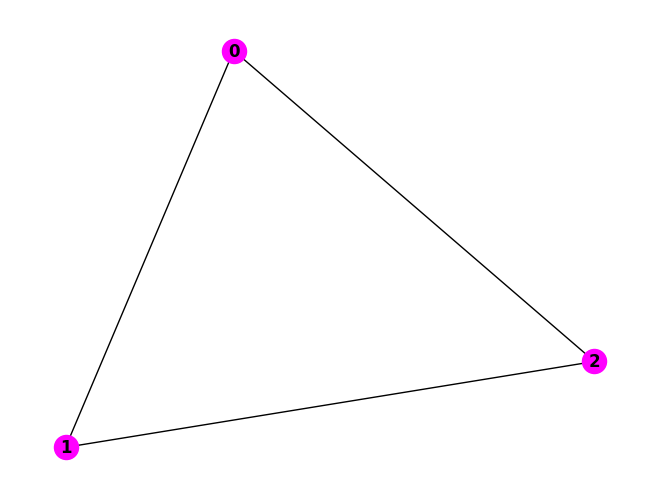

In [12]:
simpcomplexdim2 = gudhi.SimplexTree()

simpcomplexdim2.insert([0,1,2])

DrawSimplicialComplex(simpcomplexdim2)

In [13]:
# The following function returns the number of connected components of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

NumberOfConnectedComponents(simpcomplex, verbose = False)

1

In [14]:
# The following function returns the Euler characteristic of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


0

# Exercise 22

## Build triangulations of the alphabet letters, and compute their Euler characteristic.


The simplicial complex has Euler characteristic equal to 0.


0

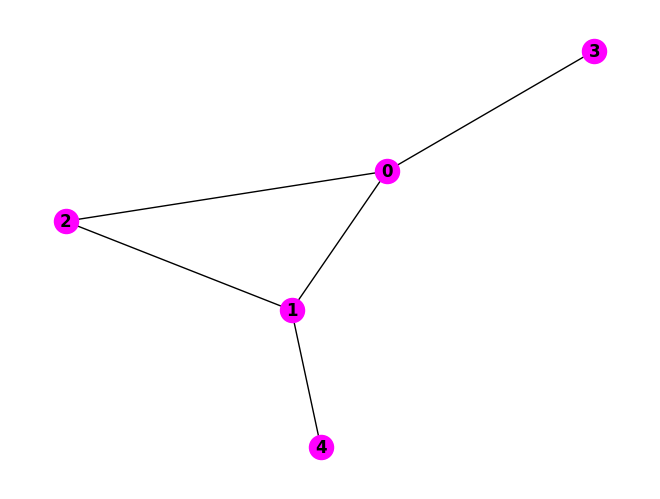

In [16]:
# We build a triangulation of the homeomorphism class {A,R}

simpcomplexA = gudhi.SimplexTree()

simpcomplexA.insert([0,1])
simpcomplexA.insert([1,2])
simpcomplexA.insert([2,0])
simpcomplexA.insert([3,0])
simpcomplexA.insert([4,1])

DrawSimplicialComplex(simpcomplexA)
EulerCharacteristic(simpcomplexA)

The simplicial complex has Euler characteristic equal to -1.


-1

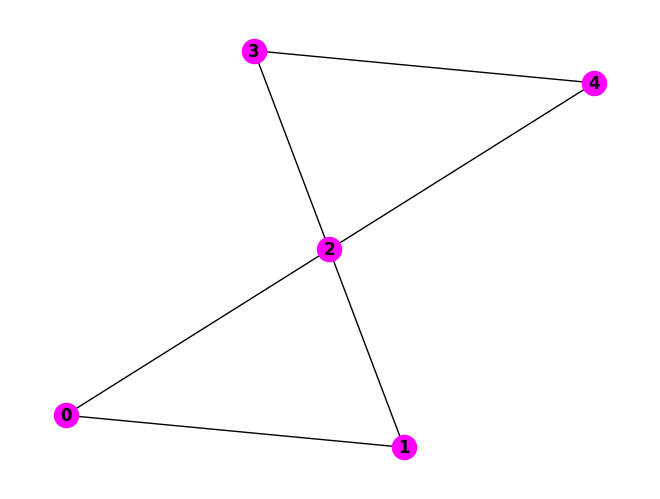

In [17]:
# We build a triangulation of the homeomorphism class {B} "A wedge of 2 circles"
simpcomplex_B = gudhi.SimplexTree()

simpcomplex_B.insert([0,1])
simpcomplex_B.insert([1,2])
simpcomplex_B.insert([2,0])
simpcomplex_B.insert([2,3])
simpcomplex_B.insert([3,4])
simpcomplex_B.insert([4,2])

DrawSimplicialComplex(simpcomplex_B)
EulerCharacteristic(simpcomplex_B)

The simplicial complex has Euler characteristic equal to 1.


1

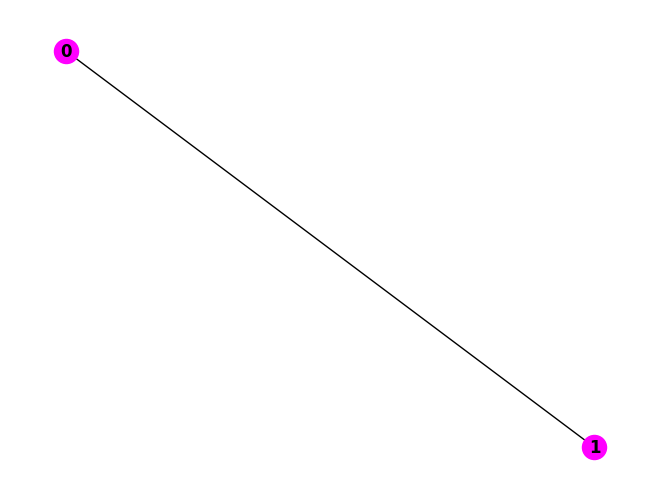

In [18]:
# We build a triangulation of the homeomorphism class {C,G,J,I,L,M.N,S,U,V,W,Z}
simpcomplex_C = gudhi.SimplexTree()

simpcomplex_C.insert([0,1])


DrawSimplicialComplex(simpcomplex_C)
EulerCharacteristic(simpcomplex_C)

The simplicial complex has Euler characteristic equal to 1.


1

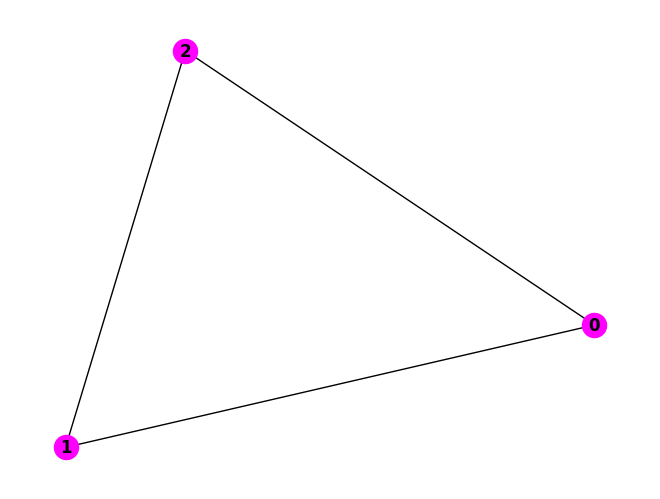

In [19]:
# We build a triangulation of the homeomorphism class {D,O}
simpcomplex_D= gudhi.SimplexTree()

simpcomplex_D.insert([0,1,2])

DrawSimplicialComplex(simpcomplex_D)
EulerCharacteristic(simpcomplex_D)

The simplicial complex has Euler characteristic equal to 1.


1

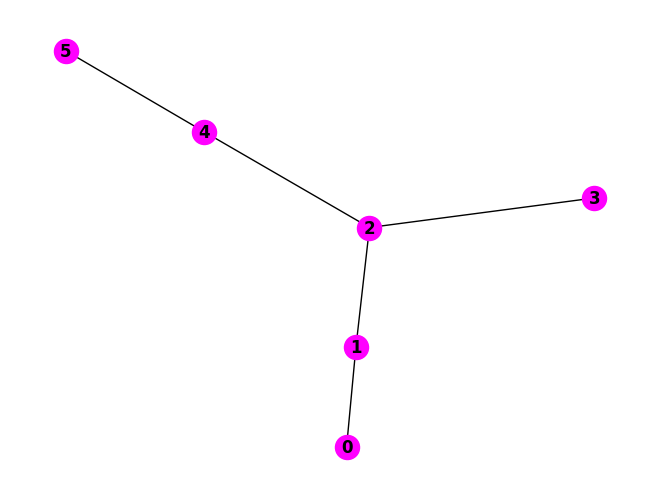

In [21]:
# We build a triangulation of the homeomorphism class {E,F,T,Y}
simpcomplex_E = gudhi.SimplexTree()

simpcomplex_E = gudhi.SimplexTree()
simpcomplex_E.insert([0,1])
simpcomplex_E.insert([1,2])
simpcomplex_E.insert([2,3])
simpcomplex_E.insert([2,4])
simpcomplex_E.insert([4,5])

DrawSimplicialComplex(simpcomplex_E)
EulerCharacteristic(simpcomplex_E)

The simplicial complex has Euler characteristic equal to 1.


1

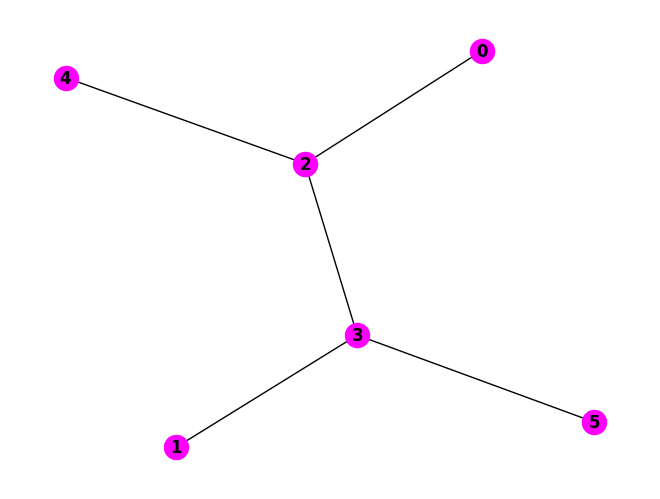

In [22]:
# We build a triangulation of the homeomorphism class {H,K}
simpcomplex_H = gudhi.SimplexTree()

simpcomplex_H.insert([0,2])
simpcomplex_H.insert([1,3])
simpcomplex_H.insert([2,3])
simpcomplex_H.insert([2,4])
simpcomplex_H.insert([3,5])

DrawSimplicialComplex(simpcomplex_H)
EulerCharacteristic(simpcomplex_H)

The simplicial complex has Euler characteristic equal to 0.


0

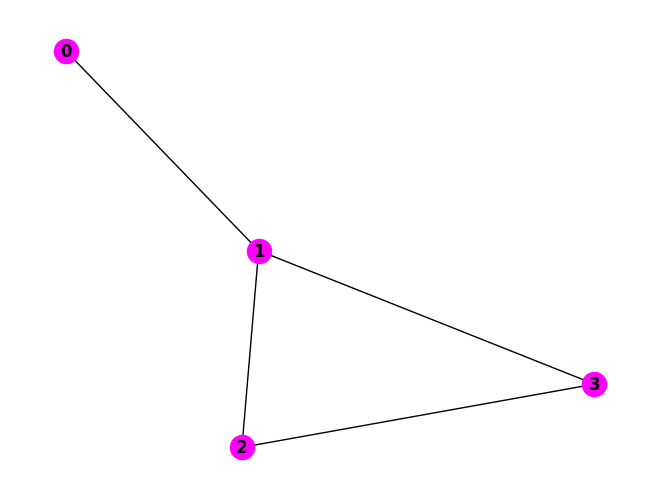

In [23]:
# We build a triangulation of the homeomorphism class {P}
simpcomplex_P = gudhi.SimplexTree()

simpcomplex_P.insert([0,1])
simpcomplex_P.insert([1,2])
simpcomplex_P.insert([2,3])
simpcomplex_P.insert([1,3])
DrawSimplicialComplex(simpcomplex_P)
EulerCharacteristic(simpcomplex_P)

The simplicial complex has Euler characteristic equal to 0.


0

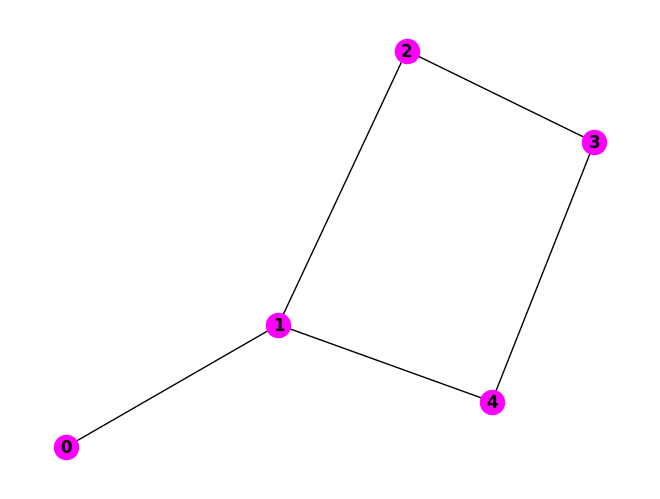

In [25]:
# We build a triangulation of the homeomorphism class {Q}
simpcomplex_Q = gudhi.SimplexTree()

simpcomplex_Q.insert([0,1])
simpcomplex_Q.insert([1,2])
simpcomplex_Q.insert([2,3])
simpcomplex_Q.insert([3,4])
simpcomplex_Q.insert([4,1])

DrawSimplicialComplex(simpcomplex_Q)
EulerCharacteristic(simpcomplex_Q)

The simplicial complex has Euler characteristic equal to 1.


1

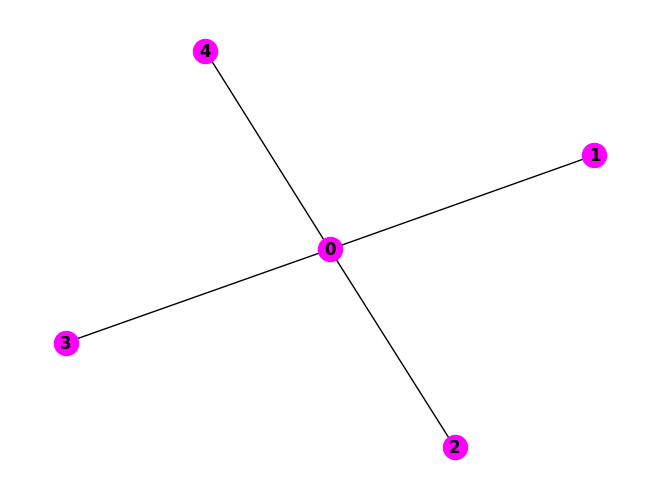

In [26]:
# We build a triangulation of the homeomorphism class {X}
simpcomplex_X = gudhi.SimplexTree()

simpcomplex_X.insert([0,1])
simpcomplex_X.insert([0,2])
simpcomplex_X.insert([0,3])
simpcomplex_X.insert([0,4])

DrawSimplicialComplex(simpcomplex_X)
EulerCharacteristic(simpcomplex_X)

  ## Given two letters that are homotopy equivalent, is it true that their Euler characteristic are equal?


If two spaces are homotopy equivalent, their Euler characteristics are equal because the Euler characteristic is a homotopy invariant. For example, by comparing the letters E and H, which are homotopy equivalent, we can see that their Euler characteristics are the same. This confirms that homotopy equivalent spaces must have the same Euler characterist

## Given two letters that are not homotopy equivalent, is it true thar their Euler characteristic are different?

Yes, given two letters that are not homotopy equivalent, their Euler characteristics must be different. This is because the Euler characteristic is a homotopy invariant. Based on the observation that letters can be grouped into three homotopy types with Euler characteristics 1, -1, and 0,

non-homotopy equivalent letters indeed have different Euler characteristics.


# Exercise 23

For every $n$, triangulate the bouquet of $n$ circles. Compute their Euler characteristic.

N is equal to 4
The simplicial complex has Euler characteristic equal to -3.


-3

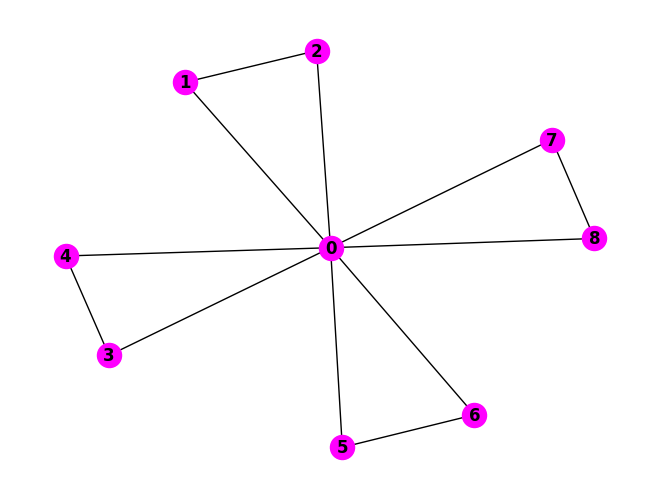

In [27]:
n = 4
bouquet = gudhi.SimplexTree()
bouquet.insert([0])
for i in range(n):
    bouquet.insert([0, 2*i+1])
    bouquet.insert([0, 2*i+2])
    bouquet.insert([2*i+1, 2*i+2])

DrawSimplicialComplex(bouquet)

print('N is equal to '+repr(n))
EulerCharacteristic(bouquet)

# Exercise 24

Implement the triangulation of the torus given in the notes.
Compute its Euler characteristic.

The simplicial complex has Euler characteristic equal to 0.


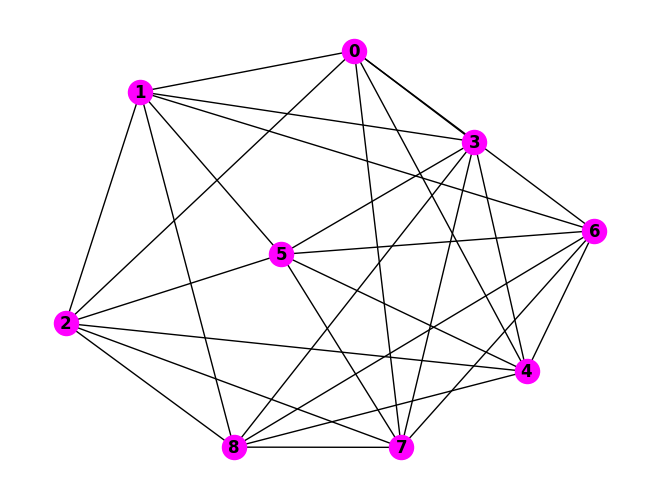

In [28]:
tor = gudhi.SimplexTree()
tor.insert([0,1,3])
tor.insert([1,3,5])
tor.insert([1,2,5])
tor.insert([2,5,7])
tor.insert([0,2,7])
tor.insert([0,3,7])

tor.insert([3,4,5])
tor.insert([4,5,6])
tor.insert([5,6,7])
tor.insert([6,7,8])
tor.insert([3,7,8])
tor.insert([3,4,8])

tor.insert([0,4,6])
tor.insert([0,1,6])
tor.insert([1,6,8])
tor.insert([1,2,8])
tor.insert([2,8,4])
tor.insert([0,2,4])

EulerCharacteristic(tor)

DrawSimplicialComplex(tor)

# Exercise 25

Consider the following dataset of $30$ points $x_0, ..., x_{29}$ in $\mathbb{R}^2$:
 ```
 {0: [0.29409772548731694, 0.6646626625013836],
 1: [0.01625840776679577, 0.1676405753593595],
 2: [0.15988905150272759, 0.6411323760808338],
 3: [0.9073191075894482, -0.16417982219713312],
 4: [-0.18661467838673884, 0.31618948583046413],
 5: [-0.3664040542098381, 0.9098590694955988],
 6: [-0.43753448716144905, -0.8820102274699417],
 7: [0.4096730199915961, -0.23801426675264126],
 8: [0.5903822103474676, -0.7285102954232894],
 9: [0.9133851839417766, -0.6606557328320093],
 10: [-0.15516122940597588, 0.7565411235103017],
 11: [-0.38626186295039866, -0.3662321656058476],
 12: [0.005209710070218199, 0.27655964872153116],
 13: [0.670078068894711, -0.00932202688834849],
 14: [-0.011268465716772091, 0.24340880308017376],
 15: [-0.6441978411451603, -0.9672635759413206],
 16: [-0.2841794022401025, -0.6734801188906114],
 17: [-0.15473260248990717, -0.1365357396855129],
 18: [0.7177096105982121, 0.9378197891592468],
 19: [-0.4677068504994166, 0.1533930130294956],
 20: [-0.32379909116817096, 0.9694800649768063],
 21: [-0.2886940472879451, -0.039544695812395725],
 22: [-0.5900701743351606, 0.8350804500575086],
 23: [0.14931959728335853, 0.869106793774487],
 24: [-0.14500672678238824, -0.3170082291070364],
 25: [0.07324547392476122, 0.6653572287065117],
 26: [-0.662990048258566, 0.1908198608241125],
 27: [-0.25641262456436276, -0.9844196180941553],
 28: [-0.5105685407819842, -0.4236604017060557],
 29: [0.6792549581008038, -0.026215820387260003]}
 ```

 Write a function that takes as an input a parameter $r\geq 0$, and returns the simplicial complex $\mathcal{G}(r)$ defined as follows:
- the vertices of $\mathcal{G}(r)$ are the points $x_0, ..., x_{29}$,
- for all $i, j \in [0,29]$ with $i\neq j$, the edge $[i,j]$ belongs to $\mathcal{G}(r)$ if and only if $||x_i-x_j||\leq r$.

Compute the number of connected components of $\mathcal{G}(r)$ for several values of $r$. What do you observe?

In [29]:
position = {0: [0.29409772548731694, 0.6646626625013836],
 1: [0.01625840776679577, 0.1676405753593595],
 2: [0.15988905150272759, 0.6411323760808338],
 3: [0.9073191075894482, -0.16417982219713312],
 4: [-0.18661467838673884, 0.31618948583046413],
 5: [-0.3664040542098381, 0.9098590694955988],
 6: [-0.43753448716144905, -0.8820102274699417],
 7: [0.4096730199915961, -0.23801426675264126],
 8: [0.5903822103474676, -0.7285102954232894],
 9: [0.9133851839417766, -0.6606557328320093],
 10: [-0.15516122940597588, 0.7565411235103017],
 11: [-0.38626186295039866, -0.3662321656058476],
 12: [0.005209710070218199, 0.27655964872153116],
 13: [0.670078068894711, -0.00932202688834849],
 14: [-0.011268465716772091, 0.24340880308017376],
 15: [-0.6441978411451603, -0.9672635759413206],
 16: [-0.2841794022401025, -0.6734801188906114],
 17: [-0.15473260248990717, -0.1365357396855129],
 18: [0.7177096105982121, 0.9378197891592468],
 19: [-0.4677068504994166, 0.1533930130294956],
 20: [-0.32379909116817096, 0.9694800649768063],
 21: [-0.2886940472879451, -0.039544695812395725],
 22: [-0.5900701743351606, 0.8350804500575086],
 23: [0.14931959728335853, 0.869106793774487],
 24: [-0.14500672678238824, -0.3170082291070364],
 25: [0.07324547392476122, 0.6653572287065117],
 26: [-0.662990048258566, 0.1908198608241125],
 27: [-0.25641262456436276, -0.9844196180941553],
 28: [-0.5105685407819842, -0.4236604017060557],
 29: [0.6792549581008038, -0.026215820387260003]}

In [30]:
def G(r):
    # Create a simplicial complex
    s = gudhi.SimplexTree()

    # Add 30 vertices to the complex
    for i in range(30):
        s.insert([i])

    # Add edges between vertices if their Euclidean distance is <= r
    for i in range(30):
        for j in range(i):
            if np.sqrt((position[i][0] - position[j][0])**2 + (position[i][1] - position[j][1])**2) <= r:
                s.insert([i, j])

    # Draw the simplicial complex
    DrawSimplicialComplex(s, position)

    # Compute the number of connected components
    NumberOfConnectedComponents(s)

The simplicial complex admits 28 connected component(s).


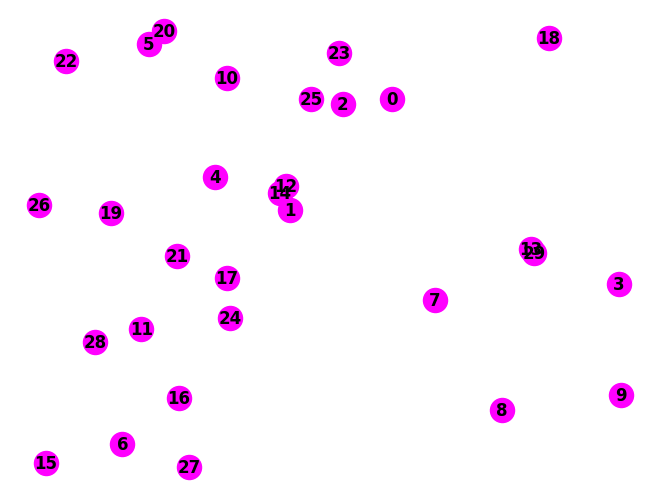

In [31]:
# at r=0.05
G(r=0.05)

The simplicial complex admits 25 connected component(s).


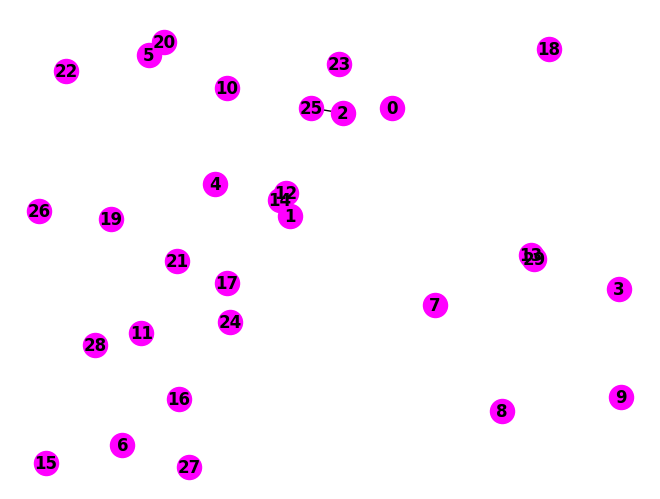

In [32]:
# at r=0.1
G(r=0.1)

The simplicial complex admits 19 connected component(s).


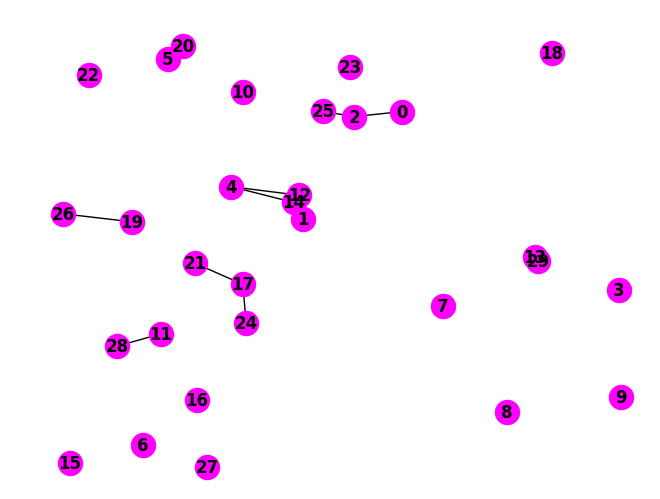

In [33]:
# at r=0.2
G(r=0.2)

The simplicial complex admits 4 connected component(s).


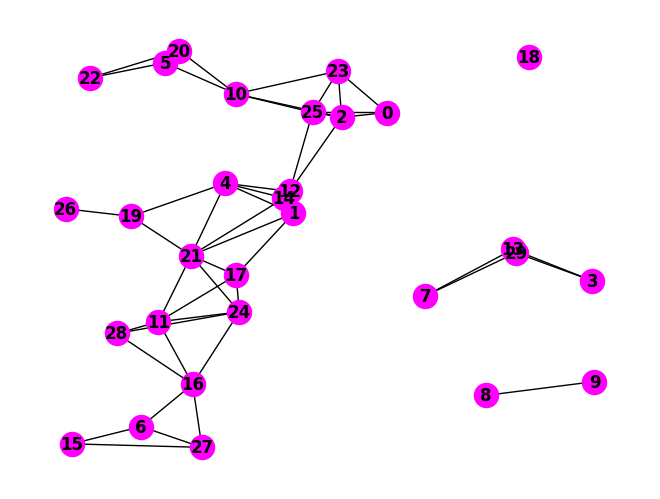

In [34]:
# at r=0.4
G(r=0.4)

The simplicial complex admits 3 connected component(s).


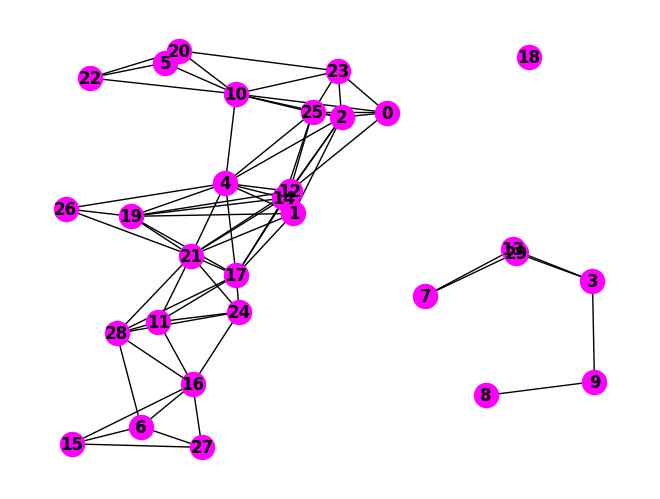

In [35]:
# at r=0.05
G(r=0.5)

The simplicial complex admits 1 connected component(s).


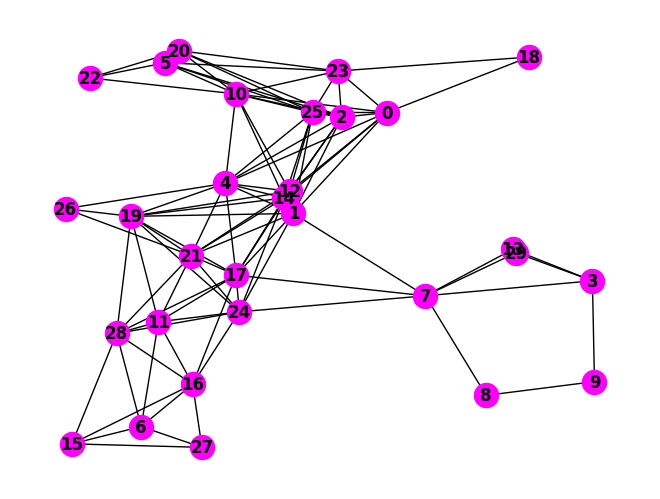

In [36]:
# at r=0.6
G(r=0.6)

The simplicial complex admits 1 connected component(s).


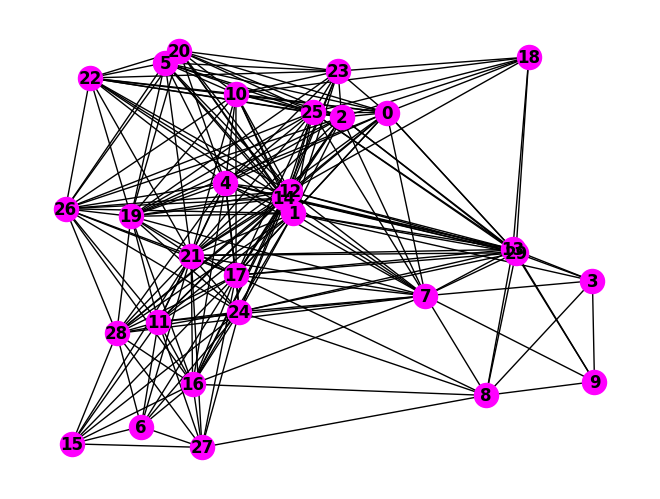

In [37]:
# at r=1
G(r=1)

The simplicial complex admits 1 connected component(s).


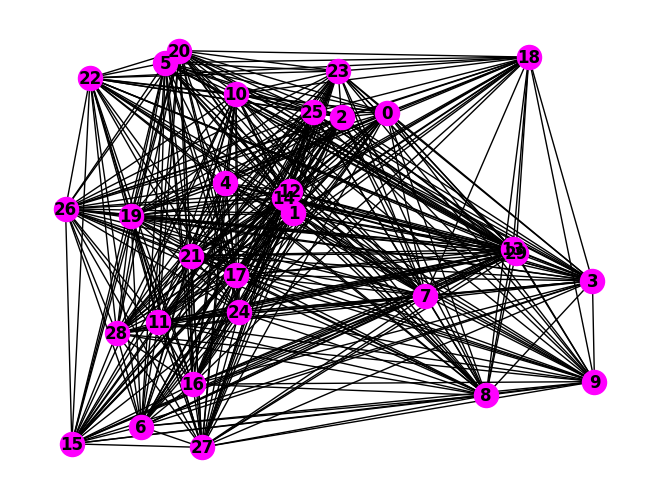

In [38]:
# at r=2
G(r=2)

I observed that, as the radius increases, the number of connected components decreases.  We finally get one connected component at $r=0.6$. We still have one connected component even when we increase the value of $r$.

# Exercise 26

A *Erdős–Rényi random graph $\mathcal{G}(n,p)$* is a simplicial complex obtained as follows:
- add $n$ vertices $1,...,n$,
- add each edge $[a,b]$, where $a,b \in [1,n]$, to the complex with probability $p$.

Builds a function that, given $n$ and $p$, outputs a simplicial complex $\mathcal{G}(n,p)$.
Observe the influence of $p$ on the number of connected components of $\mathcal{G}(10,p)$ and $\mathcal{G}(100,p)$.

*Hint:* If $V$ is a list, `itertools.combinations(V,2)` can be used to generate all the non-ordered pairs `[a,b]` in `V` (package `itertools`).
The command `random.random()` can be used to generate a random number between 0 and 1, and `random.random()<p` is  `True` with probability  `p` (package `random`).

In [39]:
import itertools
import random

In [40]:
def random_Graph(n,p):
    V = list(range(n))
    simpcomplex_Erdos = gudhi.SimplexTree()
    for i in range(n):
        simpcomplex_Erdos.insert([i])
    for v in itertools.combinations(V,2):
        if random.random()<p:
            simpcomplex_Erdos.insert(list(v))

    EulerCharacteristic(simpcomplex_Erdos)
    NumberOfConnectedComponents(simpcomplex_Erdos)
    DrawSimplicialComplex(simpcomplex_Erdos)

The simplicial complex has Euler characteristic equal to 6.
The simplicial complex admits 7 connected component(s).


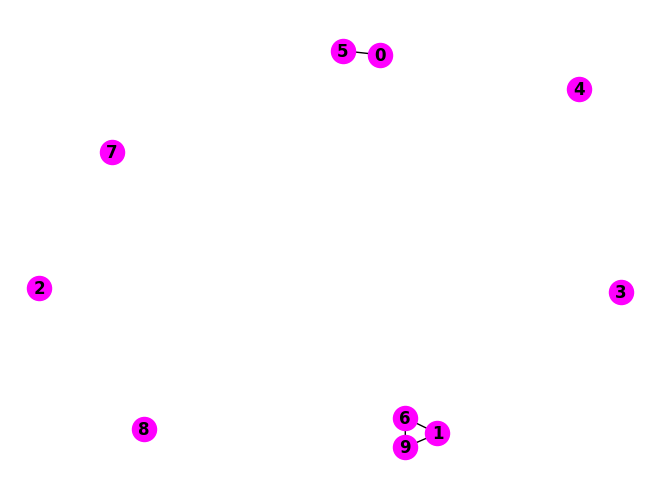

In [41]:
# At n=10 , p=0.1
random_Graph(n=10,p=0.1)

The simplicial complex has Euler characteristic equal to 3.
The simplicial complex admits 3 connected component(s).


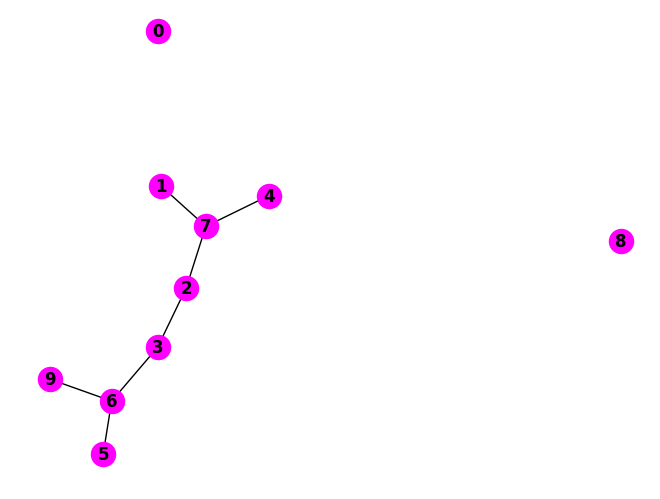

In [42]:
# At n=10 , p=0.2
random_Graph(n=10,p=0.2)

The simplicial complex has Euler characteristic equal to -8.
The simplicial complex admits 1 connected component(s).


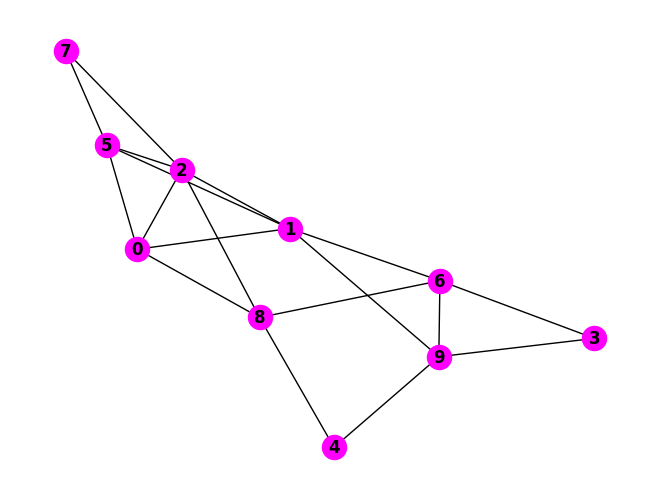

In [43]:
# At n=10 , p=0.3
random_Graph(n=10,p=0.3)

The simplicial complex has Euler characteristic equal to 50.
The simplicial complex admits 50 connected component(s).


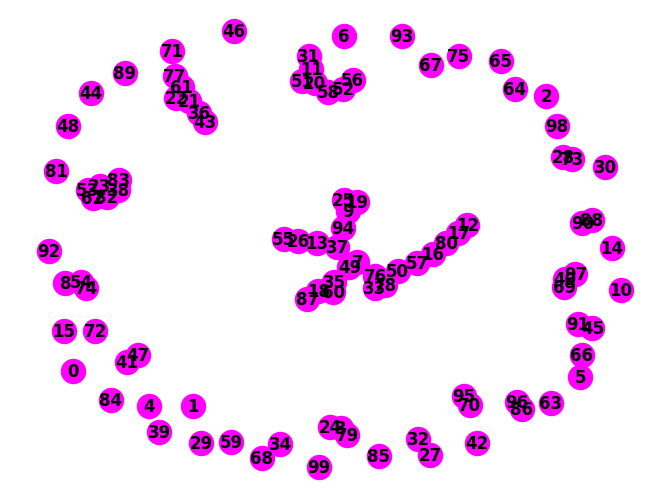

In [44]:
# At n=100 , p=0.01
random_Graph(n=100,p=0.01)

The simplicial complex has Euler characteristic equal to -52.
The simplicial complex admits 5 connected component(s).


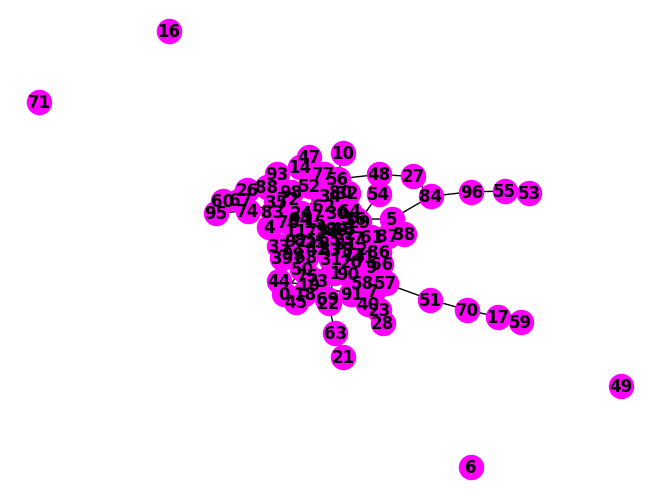

In [45]:
# At n=100 , p=0.03
random_Graph(n=100,p=0.03)

The simplicial complex has Euler characteristic equal to -125.
The simplicial complex admits 1 connected component(s).


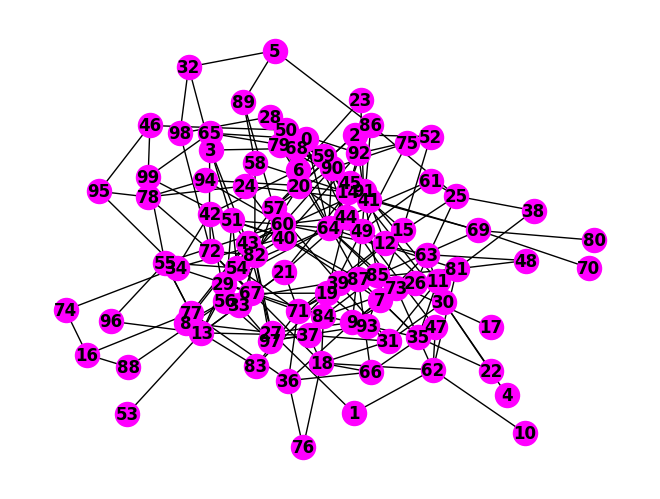

In [52]:
# At n=100 , p=0.1
random_Graph(n=100,p=0.05)

The simplicial complex has Euler characteristic equal to -388.
The simplicial complex admits 1 connected component(s).


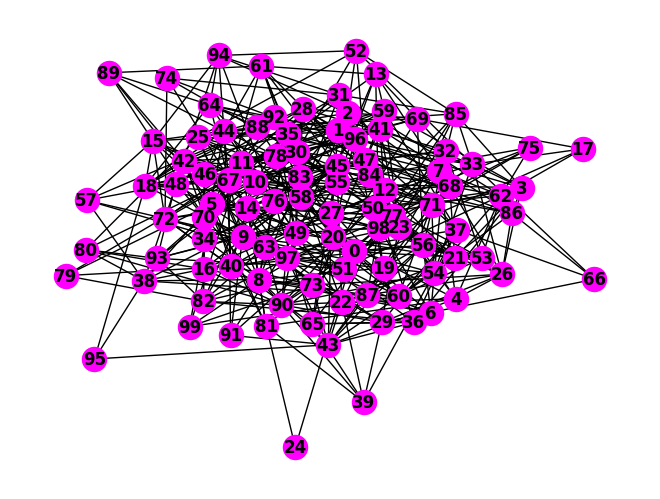

In [46]:
# At n=100 , p=0.1
random_Graph(n=100,p=0.1)

The simplicial complex has Euler characteristic equal to -894.
The simplicial complex admits 1 connected component(s).


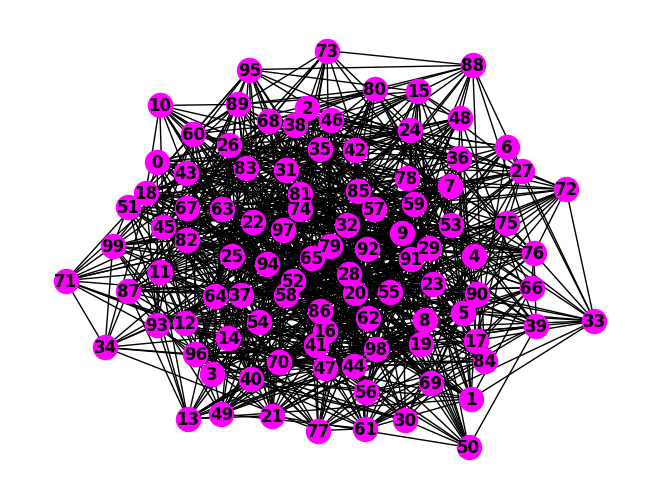

In [47]:
# At n=100 , p=0.2
random_Graph(n=100,p=0.2)

The simplicial complex has Euler characteristic equal to -2376.
The simplicial complex admits 1 connected component(s).


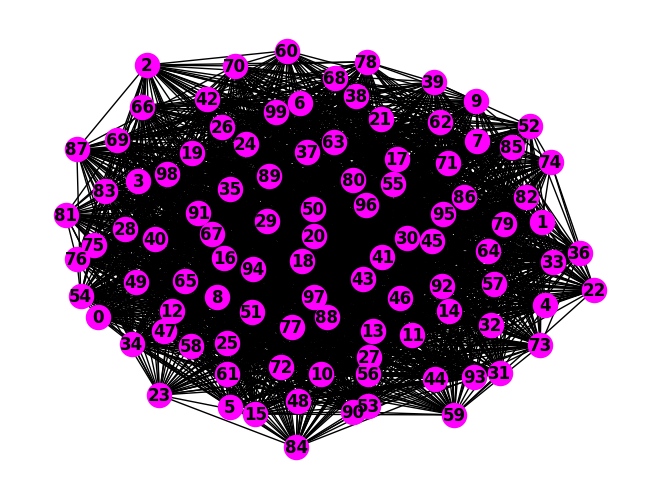

In [48]:
# At n=100 , p=0.5
random_Graph(n=100,p=0.5)

The simplicial complex has Euler characteristic equal to -4378.
The simplicial complex admits 1 connected component(s).


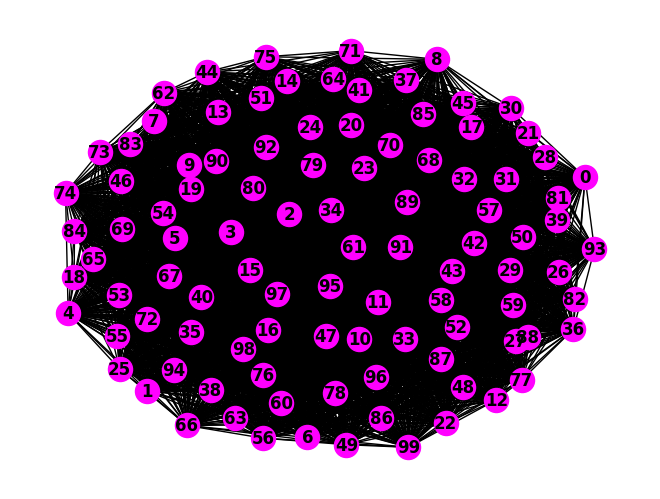

In [49]:
# At n=100 , p=0.9
random_Graph(n=100,p=0.9)

### The influence of $p$ on the number of connected components of $\mathcal{G}(10,p)$ and $\mathcal{G}(100,p)$.


It can be observed that, as the value of $p$ increases, the number of connected components also decreases until it gets to $1$ connected component and stays there no matter the increase you make.

For $n=10$ we got one connected component at $p=0.3$

 and for $n=100$ we got one connected component at $p=0.05$